In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from scipy import linalg, optimize

In [3]:
from scipy import special

In [4]:
def drumhead_height(n, k, distance, angle, t):
   kth_zero = special.jn_zeros(n, k)[-1]
   return np.cos(t) * np.cos(n*angle) * special.jn(n, distance*kth_zero)

In [5]:
theta = np.r_[0:2*np.pi:50j]

In [6]:
radius = np.r_[0:1:50j]

In [7]:
x = np.array([r * np.cos(theta) for r in radius])
y = np.array([r * np.sin(theta) for r in radius])
z = np.array([drumhead_height(1, 1, r, theta, 0.5) for r in radius])

In [8]:
import matplotlib.pyplot as plt

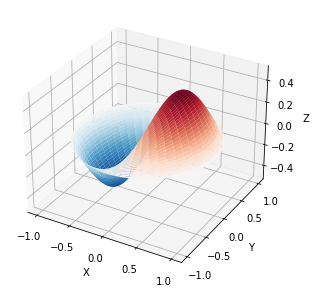

In [9]:
fig = plt.figure()
ax = fig.add_axes(rect=(0, 0.05, 0.95, 0.95), projection='3d')
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='RdBu_r', vmin=-0.5, vmax=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xticks(np.arange(-1, 1.1, 0.5))
ax.set_yticks(np.arange(-1, 1.1, 0.5))
ax.set_zlabel('Z')
plt.show()

In [10]:
import numpy as np

In [11]:
from scipy import linalg

In [12]:
A = np.array([[1, 2], [3, 4]])

In [13]:
A

array([[1, 2],
       [3, 4]])

In [14]:
b = np.array([[5], [6]])

In [15]:
linalg.inv(A).dot(b)

array([[-4. ],
       [ 4.5]])

In [16]:
A.dot(linalg.inv(A).dot(b)) - b 

array([[0.],
       [0.]])

In [17]:
np.linalg.solve(A, b)  # fast

array([[-4. ],
       [ 4.5]])

In [18]:
A.dot(np.linalg.solve(A, b)) - b  # check

array([[0.],
       [0.]])

In [19]:
A = np.array([[1,2],[3,4]])
linalg.det(A)

-2.0

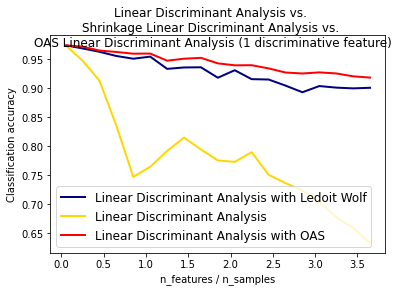

In [20]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.covariance import OAS


n_train = 20  # samples for training
n_test = 200  # samples for testing
n_averages = 50  # how often to repeat classification
n_features_max = 75  # maximum number of features
step = 4  # step size for the calculation


def generate_data(n_samples, n_features):
    """Generate random blob-ish data with noisy features.

    This returns an array of input data with shape `(n_samples, n_features)`
    and an array of `n_samples` target labels.

    Only one feature contains discriminative information, the other features
    contain only noise.
    """
    X, y = make_blobs(n_samples=n_samples, n_features=1, centers=[[-2], [2]])

    # add non-discriminative features
    if n_features > 1:
        X = np.hstack([X, np.random.randn(n_samples, n_features - 1)])
    return X, y


acc_clf1, acc_clf2, acc_clf3 = [], [], []
n_features_range = range(1, n_features_max + 1, step)
for n_features in n_features_range:
    score_clf1, score_clf2, score_clf3 = 0, 0, 0
    for _ in range(n_averages):
        X, y = generate_data(n_train, n_features)

        clf1 = LinearDiscriminantAnalysis(solver='lsqr',
                                          shrinkage='auto').fit(X, y)
        clf2 = LinearDiscriminantAnalysis(solver='lsqr',
                                          shrinkage=None).fit(X, y)
        oa = OAS(store_precision=False, assume_centered=False)
        clf3 = LinearDiscriminantAnalysis(solver='lsqr',
                                          covariance_estimator=oa).fit(X, y)

        X, y = generate_data(n_test, n_features)
        score_clf1 += clf1.score(X, y)
        score_clf2 += clf2.score(X, y)
        score_clf3 += clf3.score(X, y)

    acc_clf1.append(score_clf1 / n_averages)
    acc_clf2.append(score_clf2 / n_averages)
    acc_clf3.append(score_clf3 / n_averages)

features_samples_ratio = np.array(n_features_range) / n_train

plt.plot(features_samples_ratio, acc_clf1, linewidth=2,
         label="Linear Discriminant Analysis with Ledoit Wolf", color='navy')
plt.plot(features_samples_ratio, acc_clf2, linewidth=2,
         label="Linear Discriminant Analysis", color='gold')
plt.plot(features_samples_ratio, acc_clf3, linewidth=2,
         label="Linear Discriminant Analysis with OAS", color='red')

plt.xlabel('n_features / n_samples')
plt.ylabel('Classification accuracy')

plt.legend(loc=3, prop={'size': 12})
plt.suptitle('Linear Discriminant Analysis vs. ' + '\n'
             + 'Shrinkage Linear Discriminant Analysis vs. ' + '\n'
             + 'OAS Linear Discriminant Analysis (1 discriminative feature)')
plt.show()

In [21]:
a = np.array((1,2,3))

In [22]:
b = np.array((4,5,6))

In [23]:
np.hstack((a,b))

array([1, 2, 3, 4, 5, 6])

In [24]:
a = np.array([[1],[2],[3]])

In [25]:
b = np.array([[4],[5],[6]])

In [26]:
np.hstack((a,b))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [27]:
from sklearn import datasets

In [28]:
iris = datasets.load_iris()

In [29]:
digits = datasets.load_digits()

In [30]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [31]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [32]:
from sklearn import svm

In [33]:
clf = svm.SVC(gamma=0.001, C=100.)

In [34]:
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, gamma=0.001)

In [35]:
clf.predict(digits.data[-1:])

array([8])